In [60]:
#import dependencies
import pandas as pd
from sqlalchemy import create_engine 
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# Extracting from CSV and Wikipedia

In [61]:
#Importing csv file
filepath = 'alcoholSubstanceAbuse.csv'

In [62]:
df = pd.read_csv(filepath)

In [63]:
df.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Both sexes,0.210
1,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Male,0.360
2,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Female,0.055
3,Afghanistan,2015,Total (recorded+unrecorded) alcohol per capita...,Both sexes,0.210
4,Afghanistan,2015,Total (recorded+unrecorded) alcohol per capita...,Male,0.350


In [64]:
#Scraping wikipedia using pandas
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita'
raw = pd.read_html(url)
#raw

In [65]:
#Pulling out the relevant table from html 
df_percapita = raw[0]
df_percapita

,0,1,2
0,International Monetary Fund (2020 estimates)[3],World Bank (2019)[4],United Nations (2019)[5]
1,"Rank Country/Territory US$ 1 Luxembourg 109,6...",Rank Country/Territory US$ 1 Monaco (2018) 18...,"Rank Country/Territory US$ 1 Monaco 190,532 2..."
2,Rank,Country/Territory,US$
3,1,Luxembourg,109602
4,2,Switzerland,81867
...,...,...,...
607,190,South Sudan,448
608,191,Malawi,435
609,192,Burundi,260
610,193,Somalia,105


# Transforming both datasets

Total alcohol consumption per capita dataframe

In [66]:
df

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Both sexes,0.210
1,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Male,0.360
2,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Female,0.055
3,Afghanistan,2015,Total (recorded+unrecorded) alcohol per capita...,Both sexes,0.210
4,Afghanistan,2015,Total (recorded+unrecorded) alcohol per capita...,Male,0.350
...,...,...,...,...,...
2782,Zimbabwe,2005,Total (recorded+unrecorded) alcohol per capita...,Male,4.720
2783,Zimbabwe,2005,Total (recorded+unrecorded) alcohol per capita...,Female,0.990
2784,Zimbabwe,2000,Total (recorded+unrecorded) alcohol per capita...,Both sexes,2.460
2785,Zimbabwe,2000,Total (recorded+unrecorded) alcohol per capita...,Male,4.160


In [67]:
#Renaming the headings and dropping the indicator column
df = df.rename(columns={'Location':'Country','Dim1':'Sex','First Tooltip':'Total alcohol per capita'})
df = df.drop(columns=['Indicator'])
df.head(20)

,Country,Period,Sex,Total alcohol per capita
0,Afghanistan,2018,Both sexes,0.210
1,Afghanistan,2018,Male,0.360
2,Afghanistan,2018,Female,0.055
3,Afghanistan,2015,Both sexes,0.210
4,Afghanistan,2015,Male,0.350
5,Afghanistan,2015,Female,0.054
6,Afghanistan,2010,Both sexes,0.210
7,Afghanistan,2010,Male,0.360
8,Afghanistan,2010,Female,0.054
9,Albania,2018,Both sexes,7.170


In [68]:
#Extracting the rows of interest
df = df[(df['Period']==2018) & (df['Sex']== 'Both sexes')]
df

,Country,Period,Sex,Total alcohol per capita
0,Afghanistan,2018,Both sexes,0.210
9,Albania,2018,Both sexes,7.170
24,Algeria,2018,Both sexes,0.950
39,Andorra,2018,Both sexes,11.020
54,Angola,2018,Both sexes,6.940
...,...,...,...,...
2712,Venezuela (Bolivarian Republic of),2018,Both sexes,4.140
2727,Viet Nam,2018,Both sexes,8.660
2742,Yemen,2018,Both sexes,0.051
2757,Zambia,2018,Both sexes,6.540


GDP Per Capita dataframe

In [69]:
df_percapita

,0,1,2
0,International Monetary Fund (2020 estimates)[3],World Bank (2019)[4],United Nations (2019)[5]
1,"Rank Country/Territory US$ 1 Luxembourg 109,6...",Rank Country/Territory US$ 1 Monaco (2018) 18...,"Rank Country/Territory US$ 1 Monaco 190,532 2..."
2,Rank,Country/Territory,US$
3,1,Luxembourg,109602
4,2,Switzerland,81867
...,...,...,...
607,190,South Sudan,448
608,191,Malawi,435
609,192,Burundi,260
610,193,Somalia,105


In [70]:
#Cleaning up dataframe
df_percapita = df_percapita.drop([0,1,2])
df_percapita = df_percapita.rename(columns={0:'Rank',1:'Country', 2:'GDP Per Capita'})
df_percapita.reset_index(drop=True, inplace=True)

df_percapita

,Rank,Country,GDP Per Capita
0,1,Luxembourg,109602
1,2,Switzerland,81867
2,3,Ireland,79669
3,4,Norway,67989
4,5,United States,63051
...,...,...,...
604,190,South Sudan,448
605,191,Malawi,435
606,192,Burundi,260
607,193,Somalia,105


In [71]:
print(df_percapita['GDP Per Capita'].unique)

<bound method Series.unique of 0      109602
1       81867
2       79669
3       67989
4       63051
        ...  
604       448
605       435
606       260
607       105
608       NaN
Name: GDP Per Capita, Length: 609, dtype: object>


In [72]:
#Dropping the GDP Per Capita row that has US$ by using its index and dropping NA/NAN 
indexNames = df_percapita[df_percapita['GDP Per Capita'] == 'US$'].index
df_percapita.drop(indexNames , inplace=True)
df_percapita.dropna(subset=['GDP Per Capita'], inplace=True)

df_percapita

,Rank,Country,GDP Per Capita
0,1,Luxembourg,109602
1,2,Switzerland,81867
2,3,Ireland,79669
3,4,Norway,67989
4,5,United States,63051
...,...,...,...
603,189,Central African Republic,468
604,190,South Sudan,448
605,191,Malawi,435
606,192,Burundi,260


In [73]:
df_percapita.dtypes

Rank              object
Country           object
GDP Per Capita    object
dtype: object

In [74]:
#Changing the GDP per capita to integers and finding an average GDP per capita (There were multiple GDP per capitas from multiple sources in our table)
df_percapita["GDP Per Capita"] = df_percapita["GDP Per Capita"].astype(int)
df_percapita = df_percapita.groupby('Country')['GDP Per Capita'].mean()
df_percapita

Country
Afghanistan                    490.333333
Africa                        1884.000000
Albania                       5184.666667
Algeria                       3751.666667
Americas                     28239.000000
                                 ...     
West Bank and Gaza (2008)     3199.000000
World                        11384.000000
Yemen                          822.666667
Zambia                        1194.666667
Zimbabwe                      1283.333333
Name: GDP Per Capita, Length: 231, dtype: float64

Merging both dataframes

In [75]:
new_df = pd.merge(df, df_percapita, on='Country')
new_df = new_df.rename(columns={'Country':'country', 'Period':'period', 'Sex':'sex', 'Total alcohol per capita':'total_alcohol_per_capita','GDP Per Capita':'gdp_per_capita'})

new_df

,country,period,sex,total_alcohol_per_capita,gdp_per_capita
0,Afghanistan,2018,Both sexes,0.210,490.333333
1,Albania,2018,Both sexes,7.170,5184.666667
2,Algeria,2018,Both sexes,0.950,3751.666667
3,Andorra,2018,Both sexes,11.020,40886.500000
4,Angola,2018,Both sexes,6.940,2555.333333
...,...,...,...,...,...
157,Uzbekistan,2018,Both sexes,2.590,1748.000000
158,Vanuatu,2018,Both sexes,2.250,2986.666667
159,Yemen,2018,Both sexes,0.051,822.666667
160,Zambia,2018,Both sexes,6.540,1194.666667


# Loading into Postgres

In [76]:
from config import postgres_credentials as pc
rds_connection_string = f"{pc['user']}:{pc['password']}@localhost:5432/etl_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [77]:
engine.table_names()

In [78]:
new_df.to_sql(name="gdp_alcohol", con=engine, if_exists='append', index=False)

# Brief Analysis

In [79]:
x = new_df['gdp_per_capita']
y = new_df['total_alcohol_per_capita']

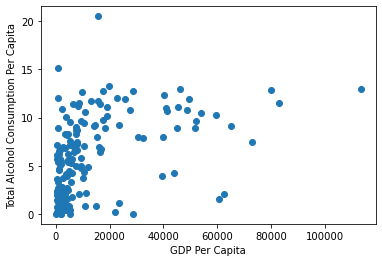

In [80]:
#Scatter plot to show relationship between gdp per capita and total alchol per capita consumption
plt.scatter(x, y)
plt.xlabel('GDP Per Capita')
plt.ylabel('Total Alcohol Consumption Per Capita')
plt.show()

In [81]:
#Pearson coefficient 
correlation = st.pearsonr(x,y)
print(f"The correlation between gdp per capita and total alcohol per capita is {round(correlation[0],2)}")

The correlation between gdp per capita and total alcohol per capita is 0.43


Text(0, 0.5, 'Total Alcohol Consumption Per Capita ')

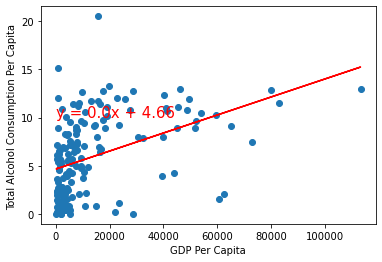

In [82]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize = 15,color = "red")
plt.xlabel('GDP Per Capita')
plt.ylabel('Total Alcohol Consumption Per Capita ')

There is a weak correlation between gdp per capita and total alcohol consumption 